In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.columns = ['Date', 'Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [33]:
fig = px.line(df, y=df['Number of Passengers'])
fig.show()

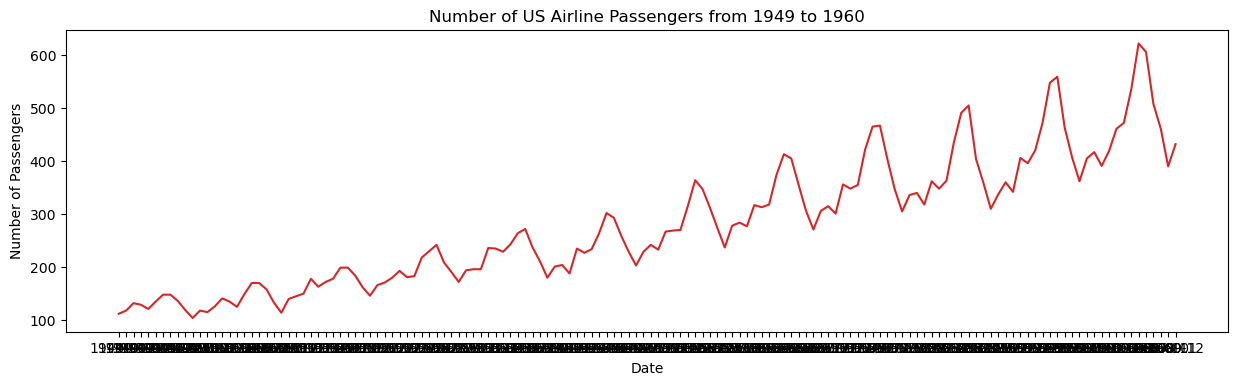

In [7]:
def plot_df(df, x, y, title="", xlabel="", ylabel="", dpi=100):
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, df['Date'], df['Number of Passengers'], "Number of US Airline Passengers from 1949 to 1960","Date", "Number of Passengers")

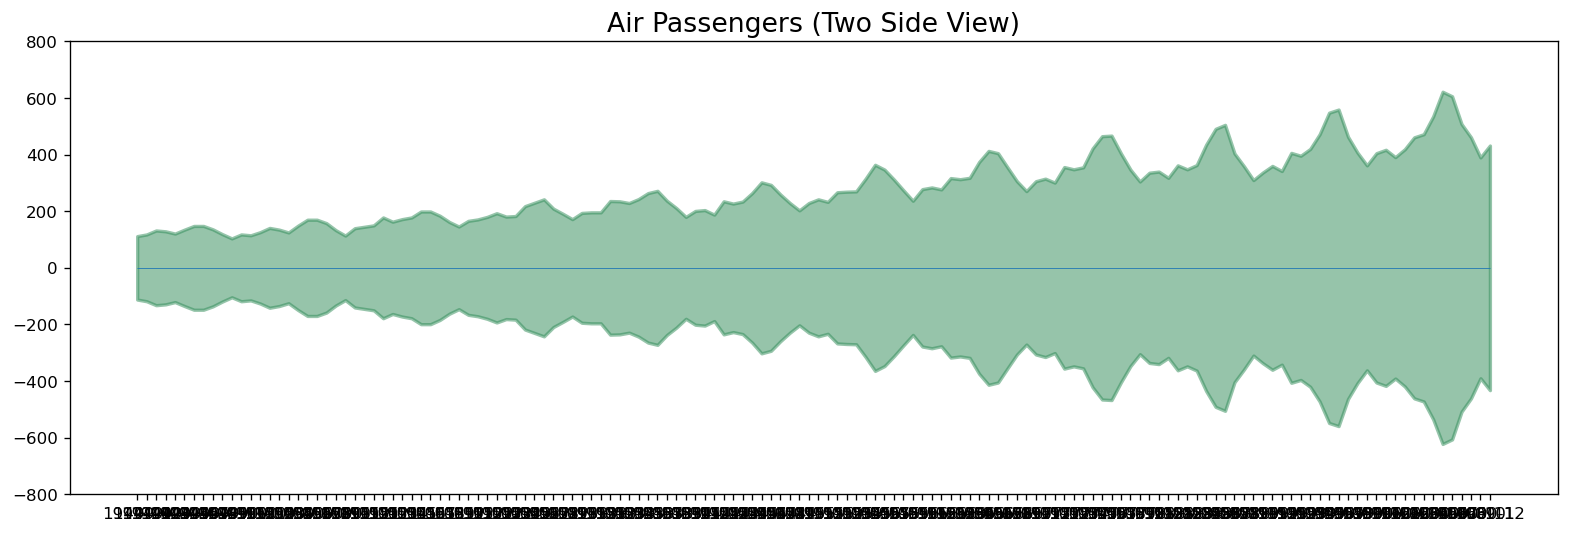

In [13]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title("Air Passengers (Two Side View)", fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

In [14]:
from dateutil.parser import parse

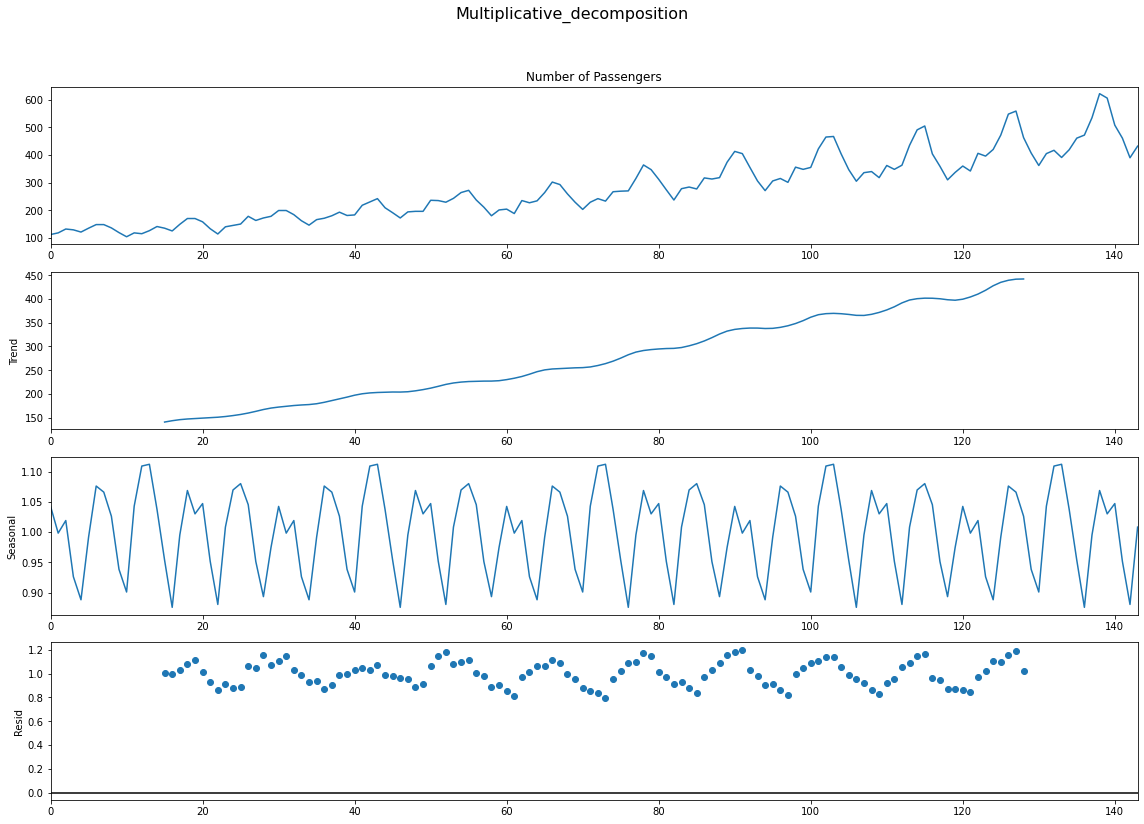

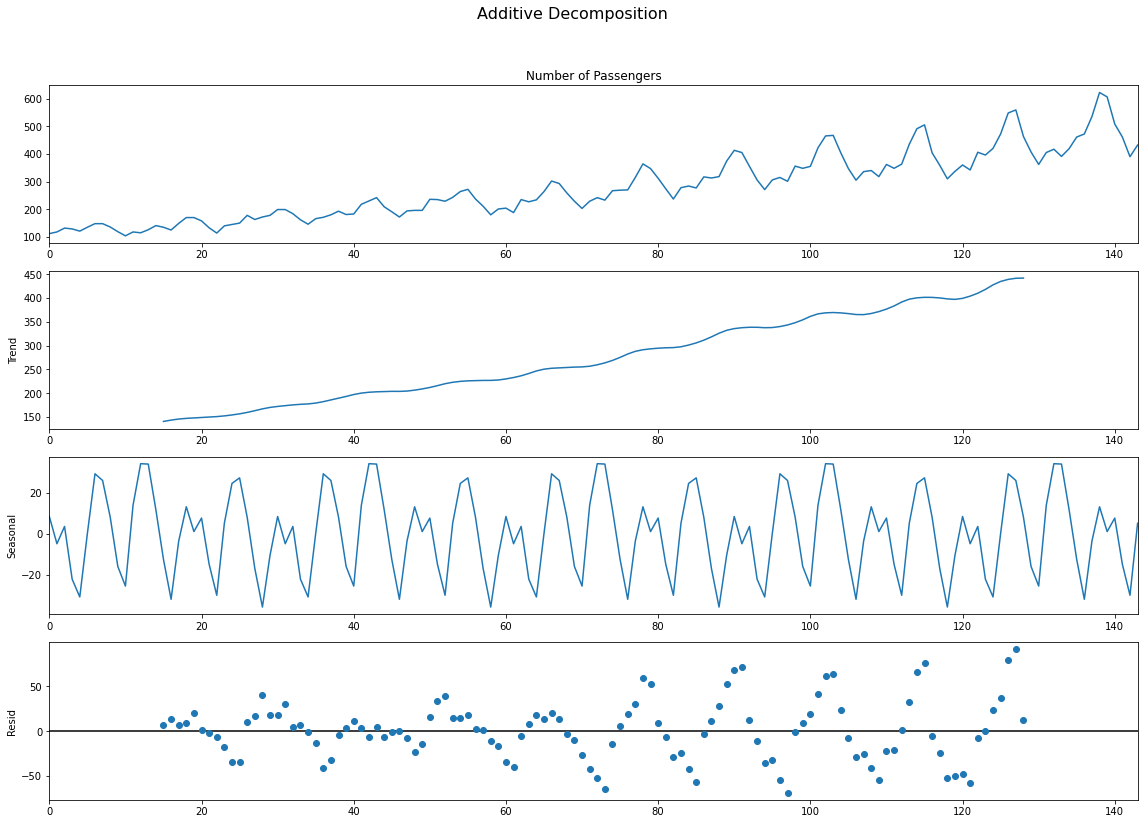

In [16]:
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

plt.rcParams.update({'figure.figsize' : (16, 12)})
multiplicative_decomposition.plot().suptitle('Multiplicative_decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
# 덧셈 방식으 잔차가 패턴이 남는다.
# 곱셈 방식은 무작위로 보이므로 곱셈분해가 선호되야 한다.

In [34]:
rolmean = df.rolling(window=9).mean()

In [35]:
fig = go.Figure(data=[
    go.Scatter(x = df.Date, y=df['Number of Passengers'], name='Passengers'),
    go.Scatter(x= df.Date, y=rolmean['Number of Passengers'], name='mean')
])
fig.show()

In [ ]:
# 이동평귱선에 따라 계절성 진폭이 커진다.

In [37]:
dftest = adfuller(df['Number of Passengers'], autolag='AIC')
df_output = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lag Used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    df_output['Critical value (%s)'%key] = value
    
print(df_output)

Test Statistic                  0.815369
p-value                         0.991880
#Lag Used                      13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [38]:
from statsmodels.tsa.stattools import kpss

In [39]:
stats, p, lags, critical_value = kpss(df['Number of Passengers'], 'ct')

/Users/hwalee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1843: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"



In [40]:
stats

0.1627365740582282

In [41]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_value}')

Test Statistics : 0.1627365740582282
p-value : 0.0360528549514765
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


<AxesSubplot:title={'center':'Random White Noise'}>

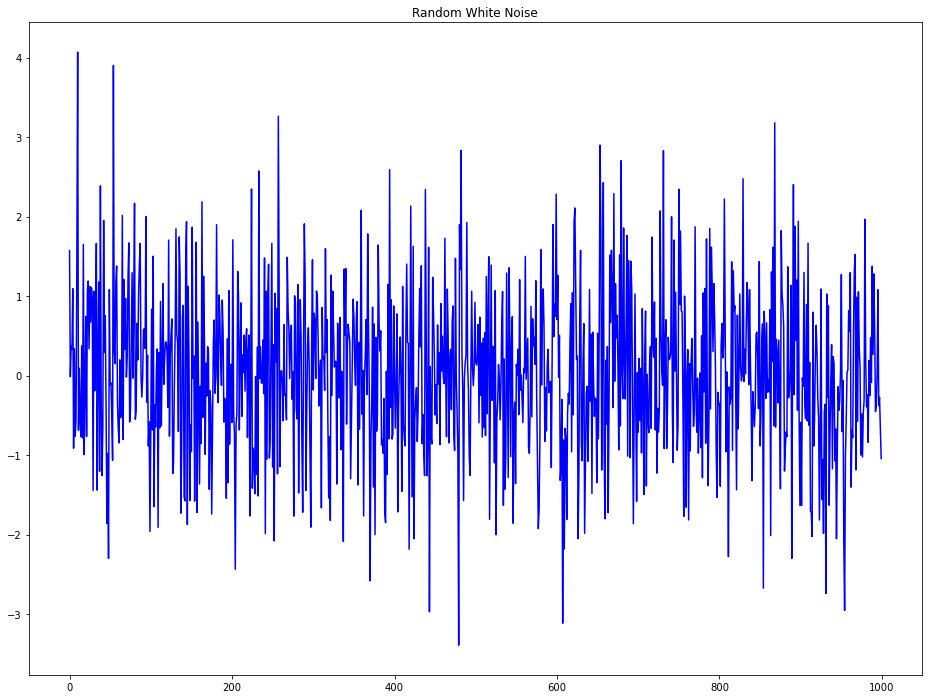

In [42]:
rand_num = np.random.randn(1000)
pd.Series(rand_num).plot(title='Random White Noise', color='b')

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

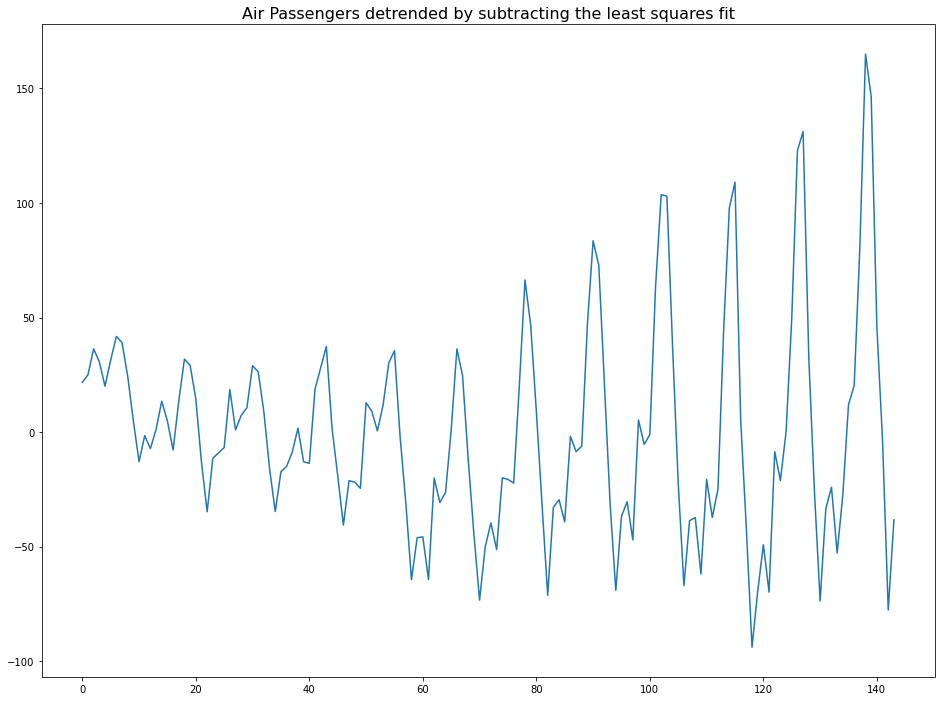

In [43]:
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

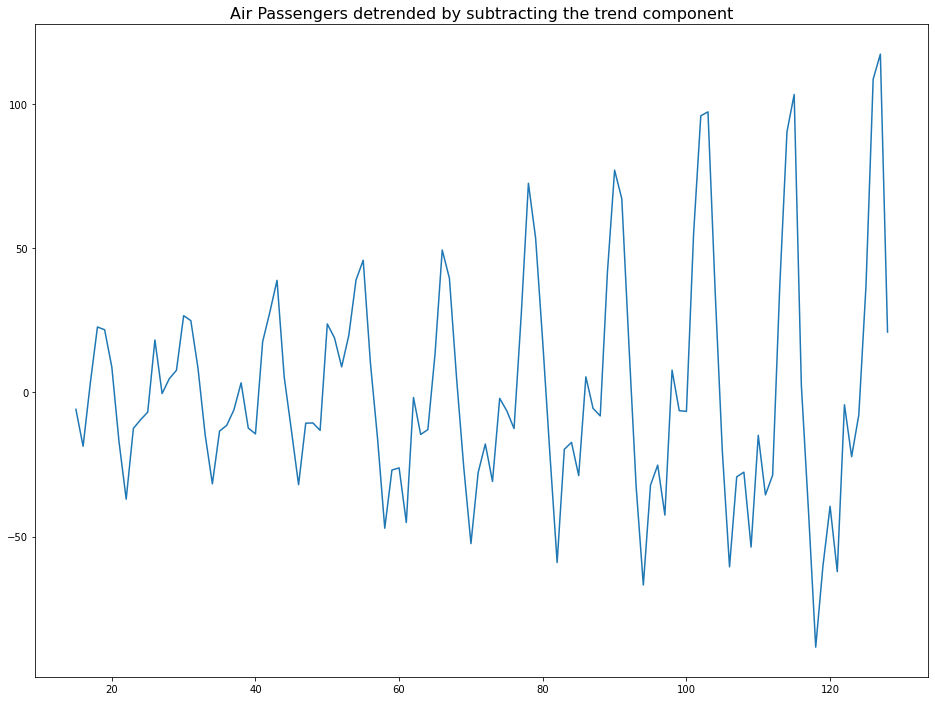

In [78]:
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'] - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

In [51]:
rolmean = df.rolling(window=12).mean()
df_detrend = df - rolmean

In [57]:
df_index = df.set_index(['Date'])

In [58]:
df_index

,Number of Passengers
Date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [59]:
rolmean = df_index.rolling(window=12).mean()
df_detrend = df_index - rolmean

In [61]:
df_detrend.dropna(inplace=True)

In [63]:
fig = px.line(df_detrend, y=df_detrend['Number of Passengers'])
fig.show()

[]

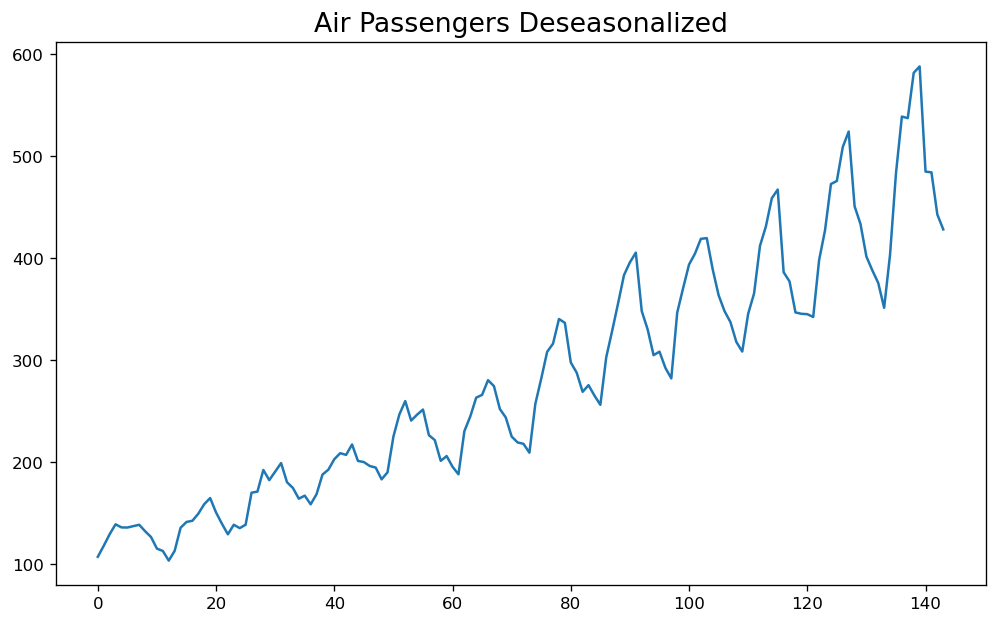

In [91]:
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

deseasonalized = df['Number of Passengers'].values / result_mul.seasonal

plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

In [82]:
final = deseasonalized - result_mul.trend.dropna()

In [85]:
final.dropna(inplace=True)

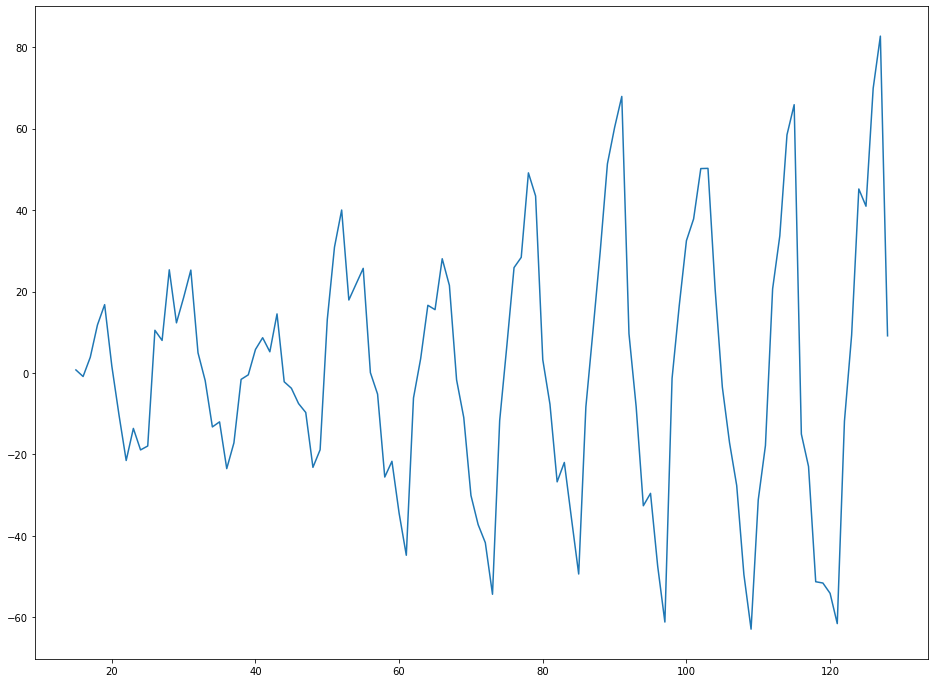

In [86]:
plt.plot(final)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

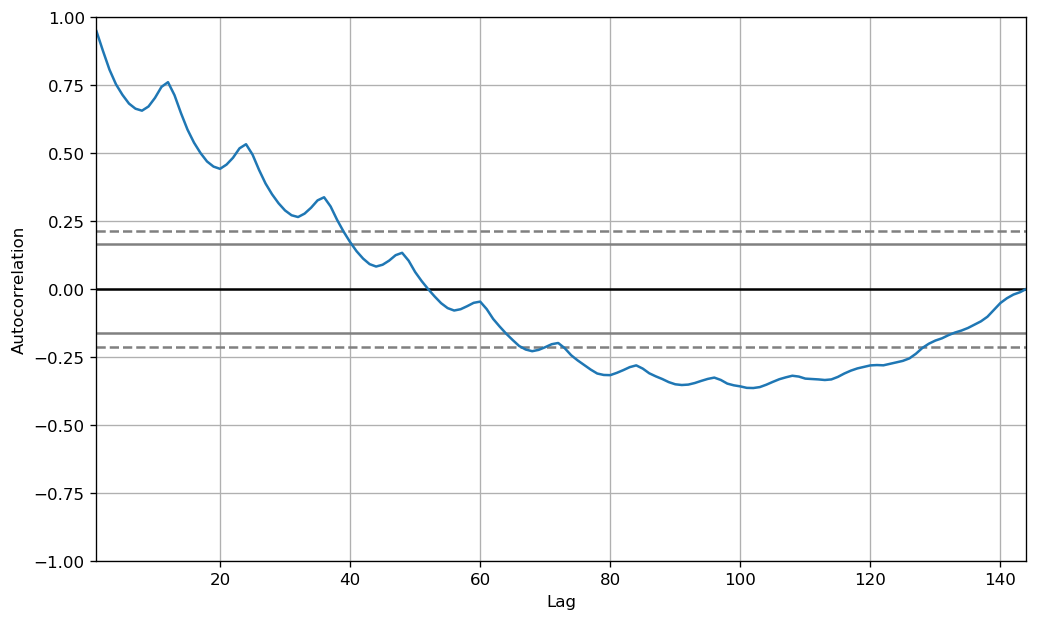

In [89]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(10, 6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

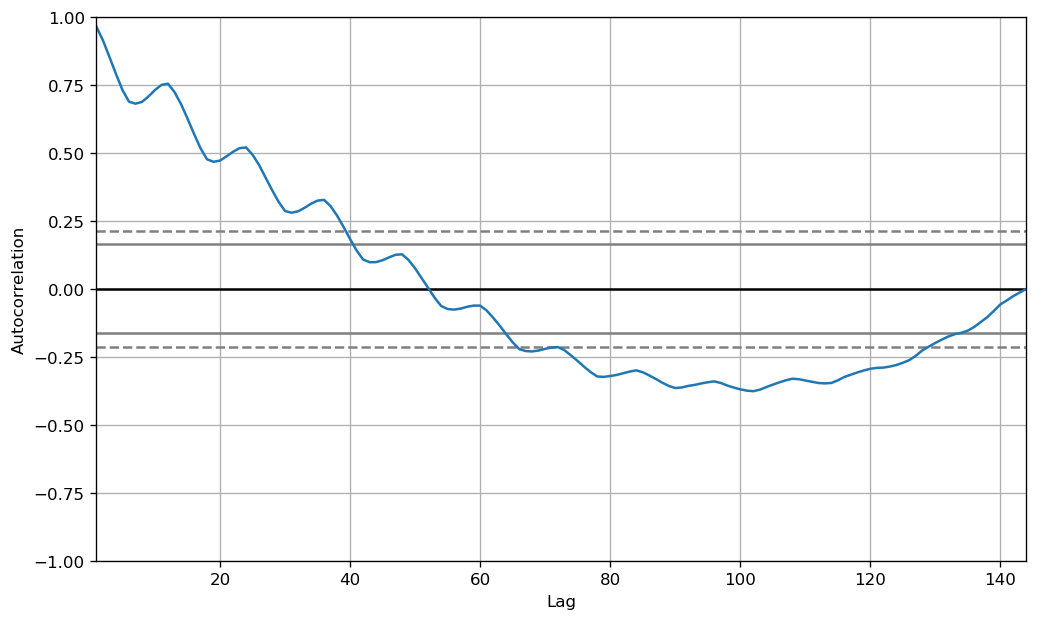

In [92]:
plt.rcParams.update({'figure.figsize':(10, 6), 'figure.dpi':120})
autocorrelation_plot(deseasonalized)

/Users/hwalee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



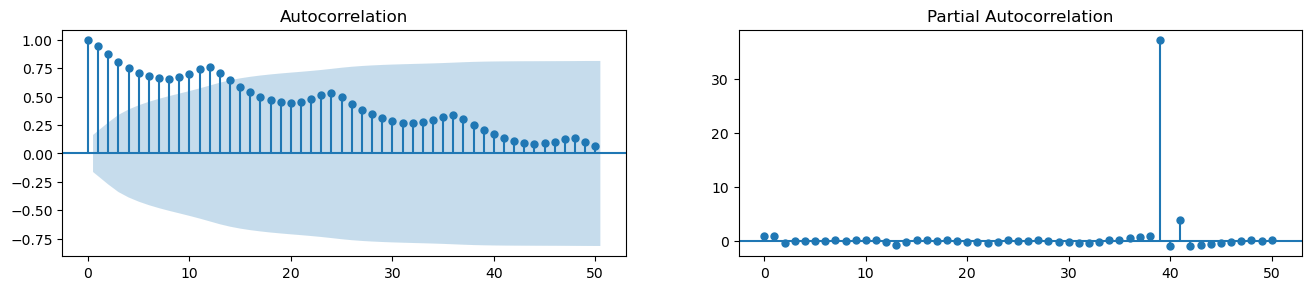

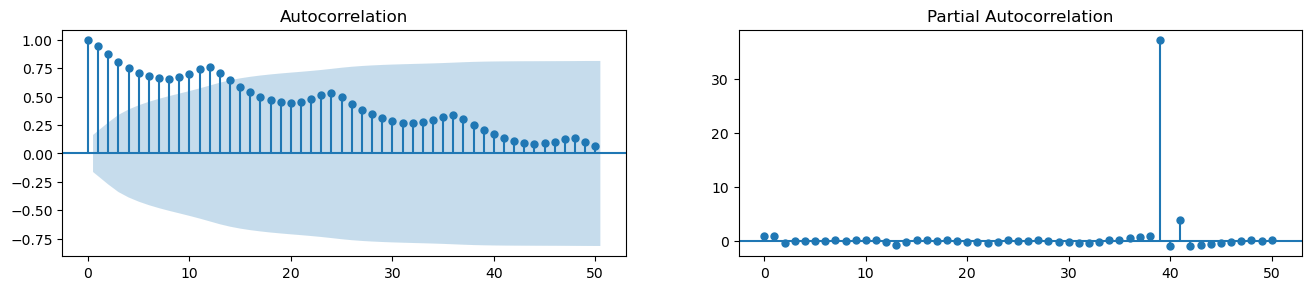

In [93]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=ax[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=ax[1])

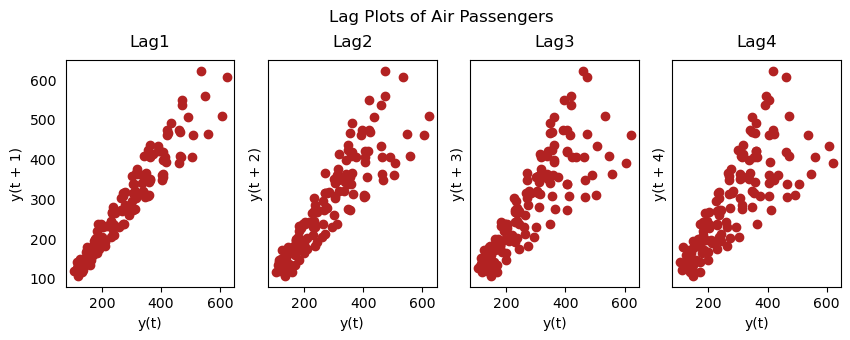

In [96]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad' : 10})

fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag' + str(i+1))
    
fig.suptitle('Lag Plots of Air Passengers', y=1.05)
plt.show()

In [104]:
axes.flatten()[:4]

array([<AxesSubplot:title={'center':'Lag1'}, xlabel='y(t)', ylabel='y(t + 1)'>,
       <AxesSubplot:title={'center':'Lag2'}, xlabel='y(t)', ylabel='y(t + 2)'>,
       <AxesSubplot:title={'center':'Lag3'}, xlabel='y(t)', ylabel='y(t + 3)'>,
       <AxesSubplot:title={'center':'Lag4'}, xlabel='y(t)', ylabel='y(t + 4)'>],
      dtype=object)

In [106]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('dataset.txt')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.7796748355736, 3.661425871353102e-12, 200.0, 1),
   'ssr_chi2test': (55.6013699581072, 8.876175235021508e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557352, 3.6614258713531555e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.6989179987324, 1.9133235086856426e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227357, 3.5267600881278635e-73, 2),
   'lrtest': (196.99559277182198, 1.6709003499115789e-43, 2),
   'params_ftest': (162.69891799873244, 1.9133235086856426e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}